# Metis - Beginner Python & Math for Data Science project

## Run Like a Hobbit

As a runner, [Marathon Maniac](https://www.marathonmaniacs.com/)/[Half Fanatic](https://www.halffanatics.com/)/[Double Agent](https://www.marathonmaniacs.com/double-agent-criteria) and [RRCA](https://www.rrca.org/) coach, I'm always looking for more information about and better answers to the following questions in order to continue improving/achieving my goals, avoiding overtraining and injury and having fun...

* How much work (i.e. Time, effort (or how fast I have to run during each part of a training plan) and distance) is required to achieve a particular distance/time goal?
* How much of the required work did I complete and how close was I to the prescribed level of effort (keeping in mind that runners should avoid training harder than they need to as this can lead to overtraining and injury)?
* Under what conditions did I train (Data such as heart rate and other temporal and environmental variables can be tracked)? 
* Did I achieve the goal I trained for? If not, how much did I miss it by?
* Can I achieve the same goal with less work?... Or, how much and how fast can I increase my training intensity/improve while avoiding overtraining and injury?

In [1]:
# https://stackoverflow.com/questions/6808064/parsing-hhmm-in-python
# https://docs.python.org/3/library/time.html
import time

def time_in_minutes(time_str):
  try:
    t = time.strptime(time_str, "%H:%M:%S")
  except ValueError:
    # Try to parse minutes and seconds instead of hours, minutes and seconds
    t = time.strptime(time_str, "%M:%S")

  return t.tm_hour * 60 + t.tm_min + t.tm_sec / 60

def minutes_in_seconds(time_str):
  t = time.strptime(time_str, "%M:%S")

  return t.tm_min * 60 + t.tm_sec

# Example/test values
goal_time = "3:45:00"
pace_per_mile_5K = "7:25"

goal_time_minutes = time_in_minutes(goal_time)
pace_per_mile_5K_minutes = time_in_minutes(pace_per_mile_5K)

print("- Goal time (Minutes): {}".format(goal_time_minutes))
print("- 5K interval pace (Minutes/mile): {}".format(pace_per_mile_5K_minutes))

# To round the result to two decimal places...
#
# https://mkaz.blog/code/python-string-format-cookbook/
# format_2_decimal_places = "{:.2f}"

# print("- Goal time (Minutes/mile rounded to two decimal places): {}".format(format_2_decimal_places.format(pace_per_mile_5K_minutes)))

pace_per_mile_5K_seconds = minutes_in_seconds(pace_per_mile_5K)

print("- 5K interval pace (Seconds/mile): {}".format(pace_per_mile_5K_seconds))

- Goal time (Minutes): 225.0
- 5K interval pace (Minutes/mile): 7.416666666666667
- 5K interval pace (Seconds/mile): 445


In [2]:
# http://lmgtfy.com/?q=miles+to+kilometers
seconds_per_km = pace_per_mile_5K_seconds / 1.60934
meters_per_second = 1000 / seconds_per_km

print("- Seconds per kilometer: {}".format(seconds_per_km))
print("- Meters per second: {}".format(meters_per_second))

def seconds_per_km(meters_per_second):
  return 1000 / meters_per_second

def seconds_per_mile(meters_per_second):
  return (1000 * 1.60934) / meters_per_second

print("- Seconds per kilometer (assuming a speed of {} m/s): {}".format(meters_per_second, seconds_per_km(meters_per_second)))
print("- Seconds per mile (assuming a speed of {} m/s): {}".format(meters_per_second, seconds_per_mile(meters_per_second)))

- Seconds per kilometer: 276.510867809164
- Meters per second: 3.616494382022472
- Seconds per kilometer (assuming a speed of 3.616494382022472 m/s): 276.510867809164
- Seconds per mile (assuming a speed of 3.616494382022472 m/s): 444.99999999999994


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker

In [4]:
# https://www.baa.org/races/boston-marathon/enter/boston-marathon-training
pace_chart = pd.read_json('./pace-chart.json', orient='columns')

pace_chart.columns = \
    ['2:45:00', '3:00:00', '3:15:00', '3:30:00', '3:45:00', '4:00:00', '4:15:00', '4:30:00', '4:45:00', '5:00:00']

pace_chart = \
    pace_chart.reindex(['5K Interval Pace', '10K Interval Pace', 'Half Marathon Pace', 'Marathon Pace', 'Easy Runs', 'Aerobic Runs'])

pace_chart

,2:45:00,3:00:00,3:15:00,3:30:00,3:45:00,4:00:00,4:15:00,4:30:00,4:45:00,5:00:00
5K Interval Pace,5:20,6:00,6:25,6:55,7:25,7:55,8:25,8:55,9:25,9:55
10K Interval Pace,5:45,6:18,6:48,7:20,7:50,8:20,8:50,9:25,10:25,10:25
Half Marathon Pace,6:00,6:38,7:08,7:40,8:15,8:48,9:18,9:50,10:25,10:55
Marathon Pace,6:20,6:55,7:30,8:03,8:38,9:13,9:45,10:20,10:55,11:30
Easy Runs,7:15,7:53,8:33,9:10,9:50,10:30,11:13,11:40,12:25,13:10
Aerobic Runs,6:50,7:25,8:00,8:40,9:18,9:55,10:33,11:08,11:45,12:25


In [5]:
pace_chart_seconds = pace_chart.applymap(lambda x: minutes_in_seconds(x))

pace_chart_seconds

,2:45:00,3:00:00,3:15:00,3:30:00,3:45:00,4:00:00,4:15:00,4:30:00,4:45:00,5:00:00
5K Interval Pace,320,360,385,415,445,475,505,535,565,595
10K Interval Pace,345,378,408,440,470,500,530,565,625,625
Half Marathon Pace,360,398,428,460,495,528,558,590,625,655
Marathon Pace,380,415,450,483,518,553,585,620,655,690
Easy Runs,435,473,513,550,590,630,673,700,745,790
Aerobic Runs,410,445,480,520,558,595,633,668,705,745


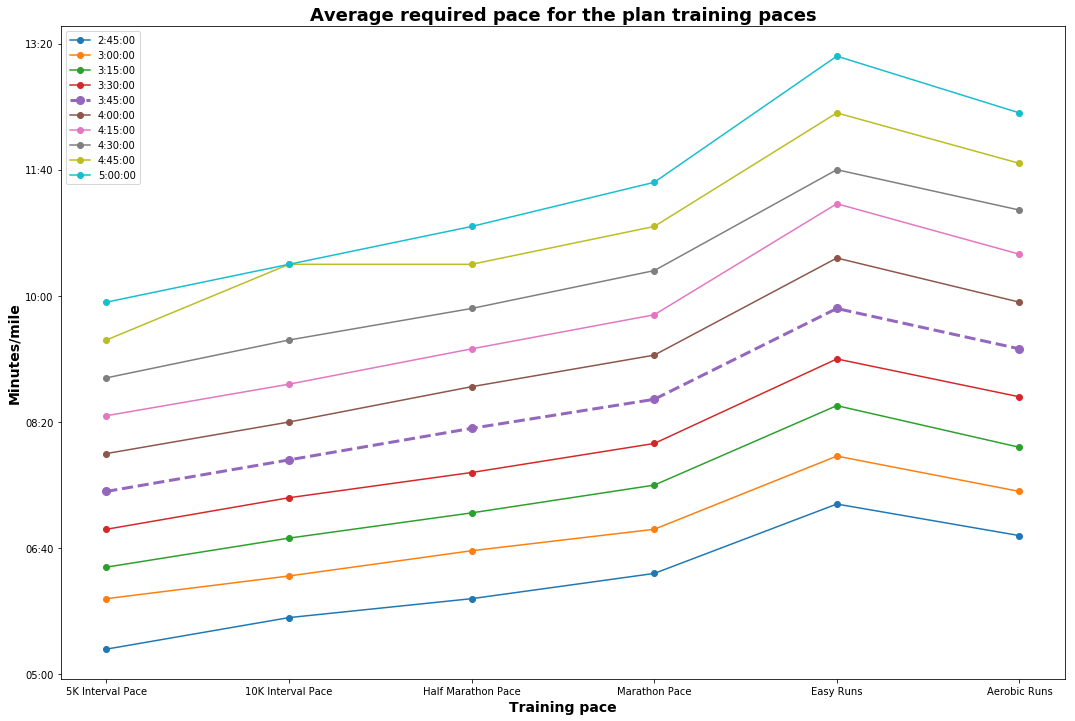

In [6]:
# Since the plot was initially too small...
#
# Get and print the plot's current/default size
# plot_size = plt.rcParams[ 'figure.figsize' ]

# print("Plot size: {}".format(plot_size))

# Make the plot bigger
plt.rcParams['figure.figsize'] = [18, 12]

ax = plt.gca()

# https://stackoverflow.com/questions/40395227/minute-and-second-format-for-x-label-of-matplotlib
formatter = \
    matplotlib.ticker.FuncFormatter(lambda seconds, pos: time.strftime('%M:%S', time.gmtime(seconds)))

ax.yaxis.set_major_formatter(formatter)

plt.plot('2:45:00', data=pace_chart_seconds, marker='o', markersize=6)
plt.plot('3:00:00', data=pace_chart_seconds, marker='o', markersize=6)
plt.plot('3:15:00', data=pace_chart_seconds, marker='o', markersize=6)
plt.plot('3:30:00', data=pace_chart_seconds, marker='o', markersize=6)
plt.plot('3:45:00', data=pace_chart_seconds, linestyle='dashed', linewidth=3, marker='o', markersize=8)
plt.plot('4:00:00', data=pace_chart_seconds, marker='o', markersize=6)
plt.plot('4:15:00', data=pace_chart_seconds, marker='o', markersize=6)
plt.plot('4:30:00', data=pace_chart_seconds, marker='o', markersize=6)
plt.plot('4:45:00', data=pace_chart_seconds, marker='o', markersize=6)
plt.plot('5:00:00', data=pace_chart_seconds, marker='o', markersize=6)

plt.title("Average required pace for the plan training paces", fontsize=18, fontweight='bold')

plt.xlabel('Training pace', fontsize=14, fontweight='bold')
plt.ylabel('Minutes/mile', fontsize=14, fontweight='bold')

plt.legend()

plt.show()

In [7]:
# Some attempts at getting a DataFrame's row... 

# Both of the following examples return a particular row
# row_1 = normalized_pace_chart.iloc[0,]

# print('-- Row ({}) --'.format(type(row_1)))

# print(row_1)

# row_2 = normalized_pace_chart.iloc[:1]

# print('-- Row ({}) --'.format(type(row_2)))

# print(row_2)

# 4 = 3:45:00 goal time
GOAL_TIME = 4

goal_time_paces = pace_chart_seconds.iloc[:,GOAL_TIME]

print('---- Training paces per mile (in seconds) for a 3:45:00 goal time ({}) ----'.format(type(goal_time_paces)))

print(goal_time_paces)

training_pace_5K = goal_time_paces[0]

print('\n- 5K training pace (in seconds) for a 3:45:00 goal time (Type: {}): {}'.format(type(training_pace_5K), training_pace_5K))


---- Training paces per mile (in seconds) for a 3:45:00 goal time (<class 'pandas.core.series.Series'>) ----
5K Interval Pace      445
10K Interval Pace     470
Half Marathon Pace    495
Marathon Pace         518
Easy Runs             590
Aerobic Runs          558
Name: 3:45:00, dtype: int64

- 5K training pace (in seconds) for a 3:45:00 goal time (Type: <class 'numpy.int64'>): 445


In [8]:
import datetime

plan = pd.read_json('./plan-baa-2019-level-4.json', orient='columns')

plan = \
    plan.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# TODO
# print(type(plan.iloc[:1,0]))
# print(type(plan.iloc[:1,0][0]['segments'][0]['distanceMin']))

# -- Constants --
DISTANCE_METERS = 0
DISTANCE_KMS = 1
DISTANCE_MILES = 2

# ---- Activity segments ----
KEY_SEGMENTS = 'segments'

KEY_DURATION = 'duration'
KEY_PACE = 'pace'
KEY_DISTANCE_MIN = 'distanceMin'
KEY_DISTANCE_MAX = 'distanceMax'

KEY_UNITS = 'units'

# ---- Repeats ----
KEY_REPEAT = 'repeat'

KEY_WORK = 'work'
KEY_REST = 'rest'
KEY_RECOVER = 'recover'

# TODO: Use KEY_DISTANCE_MIN instead?
KEY_DISTANCE = 'distance'

print('---- Goal time paces (Seconds/mile) ----')
print(goal_time_paces)

def distance(cell, goal_time_paces, distance_key = KEY_DISTANCE_MIN, result_units = DISTANCE_MILES):
    result = 0

    if KEY_SEGMENTS in cell.keys():
        segments = cell[KEY_SEGMENTS]

        # Only loop through `segments` if it's truthy (i.e. If it contains one or more segments)
        if segments:
            for segment in segments:
                keys = segment.keys()

                # If a distance has been specified, add it to the cell's total
                if distance_key in keys:
                    result += segment[distance_key]
                # If the value for the specified distance (For example, KEY_DISTANCE_MAX) isn't found but
                # a minimum distance value is found, use that instead
                elif distance_key not in keys and KEY_DISTANCE_MIN in keys:
                    result += segment[KEY_DISTANCE_MIN]
                # If a duration has been specified instead of a distance, add the distance covered
                # during the specified duration given the specified pace to the cell's total
                elif distance_key not in keys and KEY_DURATION in keys:
                    result += \
                        distance_covered(segment[KEY_DURATION], goal_time_paces[segment[KEY_PACE]])
                # If the segment is a repeat...
                elif KEY_REPEAT in keys:
                    result += repeat_distance(segment, goal_time_paces, result_units)

    return round(float(result), 5)

def repeat_distance(segment, goal_time_paces, result_units):
    repeat = segment[KEY_REPEAT]

    work = segment[KEY_WORK]
    # TODO
    rest = None

    # Repeat distance is calculated in one of two ways:
    #
    # - If a `work` and/or `recover` part's `distance` is specified, multiply its value by
    #   `repeat` and add the result to the segment's total
    # - If a `work` and/or `recover` part's `duration` is specified (and it's `distance`
    #   isn't), add the distance covered during the specified duration given the specified
    #   pace, multiply its value by `repeat` and add the result to the segment's total
    result = 0

    result += distance_from_distance_or_duration(work, goal_time_paces[work[KEY_PACE]], repeat)

    # Repeats may or may not include rest periods between the work and recovery periods
    if KEY_REST in segment.keys():
        rest = segment[KEY_REST]

    # Repeats may or may not also include recovery periods
    if KEY_RECOVER in segment.keys():
        recover = segment[KEY_RECOVER]

        result += distance_from_distance_or_duration(recover, goal_time_paces[work[KEY_PACE]], repeat)

    return round(result, 6)

def distance_from_distance_or_duration(part, seconds_per_mile, repeat, result_units = DISTANCE_MILES):
    result = 0

    if KEY_DISTANCE in part:
        distance = part[KEY_DISTANCE]
        units = part[KEY_UNITS]

        unit_converter = 1

        # If `units` isn't the same as `result_units` - A part's distance may be specified
        # in meters (if, for example, it's a 400 meter repeat) - convert the part's
        # distance into the specified result units
        if units != result_units:
            unit_converter = get_unit_converter(units, result_units)

        result += (distance * repeat) / unit_converter
    else:
        result += distance_covered(part[KEY_DURATION], seconds_per_mile, repeat)

    return result

def duration(cell, goal_time_paces, distance_key = KEY_DISTANCE_MIN):
    result = 0

    if KEY_SEGMENTS in cell.keys():
        segments = cell[KEY_SEGMENTS]

        # Only loop through `segments` if it's truthy (i.e. If it contains one or more segments)
        if segments:
            for segment in segments:
                keys = segment.keys()

                if KEY_PACE in keys:
                    pace_seconds_per_mile = segment[KEY_PACE]

                if distance_key in keys:
                    result += segment[distance_key] * goal_time_paces[pace_seconds_per_mile]

                    # TODO
                    # d = datetime.timedelta(seconds=int(result))
                # If a duration has been specified instead of a distance, add the distance covered
                # during the specified duration given the specified pace to the result
                elif distance_key not in keys and KEY_DURATION in keys:
                    result += \
                        distance_covered(segment[KEY_DURATION], goal_time_paces[segment[KEY_PACE]])
                # elif 'repeat' in keys:
                    # TODO

    return result

def get_unit_converter(units, result_units):
    # Meters to miles - http://bfy.tw/NCEZ
    if units == DISTANCE_METERS and result_units == DISTANCE_MILES:
        return 1609.344
    # Kilometers to miles
    elif units == DISTANCE_KMS and result_units == DISTANCE_MILES:
        return 1.609

def distance_covered(duration, pace, repeat = 1):
    # The distance covered in `duration` is `duration / pace` multiplied by the number of
    # times the duration is repeated
    #
    # Example:
    #
    # If the duration of the effort is 300 seconds (i.e. 5 minutes) and the required pace
    # is 500 seconds per mile, the distance covered in 300 seconds is 300 / 500 or 0.6 miles
    return (duration / pace) * repeat
    

# https://stackoverflow.com/questions/39475978/apply-function-to-each-cell-in-dataframe
distance_min = plan.applymap(lambda x: distance(x, goal_time_paces))

print('\n---- Weekly distance ----')

print('-- Minimum --')
print(distance_min)
print('-- Totals/week (Minimum) --')
print(distance_min.sum())

distance_max = plan.applymap(lambda x: distance(x, goal_time_paces, KEY_DISTANCE_MAX))

print('\n-- Maximum --')
print(distance_max)
print('-- Totals/week (Maximum) --')
print(distance_max.sum())

duration = plan.applymap(lambda x: duration(x, goal_time_paces))

print('\n---- Weekly duration ----')

print(duration)

---- Goal time paces (Seconds/mile) ----
5K Interval Pace      445
10K Interval Pace     470
Half Marathon Pace    495
Marathon Pace         518
Easy Runs             590
Aerobic Runs          558
Name: 3:45:00, dtype: int64

---- Weekly distance ----
-- Minimum --
           Week 1  Week 2    Week 3    Week 4
Monday        4.0     0.0   0.00000   0.00000
Tuesday       5.0     6.0   6.23694   7.72889
Wednesday     4.0     4.0   4.00000   4.00000
Thursday      0.0     7.0   4.00000   6.00000
Friday        4.0     4.0   8.72727   4.00000
Saturday      5.0     5.0   4.00000  12.00000
Sunday       11.0    12.0  10.83222   4.00000
-- Totals/week (Minimum) --
Week 1    33.00000
Week 2    38.00000
Week 3    37.79643
Week 4    37.72889
dtype: float64

-- Maximum --
           Week 1  Week 2    Week 3    Week 4
Monday        6.0     0.0   0.00000   0.00000
Tuesday       7.0     7.0   6.23694   7.72889
Wednesday     4.0     6.0   6.00000   6.00000
Thursday      0.0     7.0   6.00000   7.00000
Fr

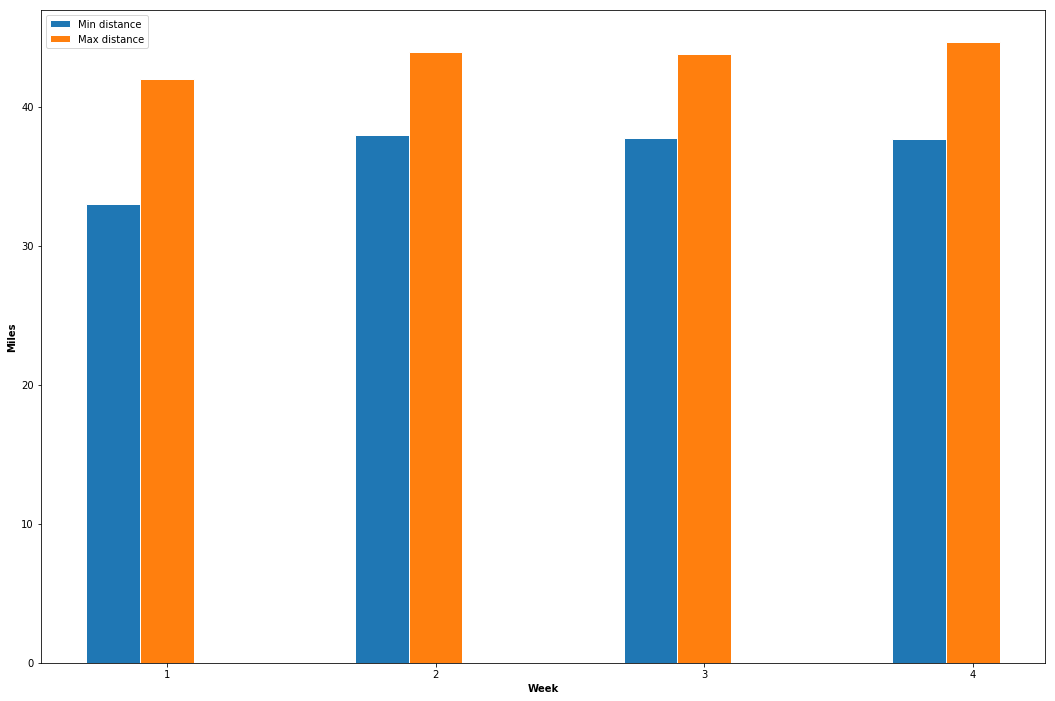

In [9]:
# https://python-graph-gallery.com/11-grouped-barplot/
bar_width = 0.2
 
# The position of the bars on the x axis
#
# Return evenly spaced values within a given interval
range_distance_min = np.arange(len(distance_min.sum()))
range_distance_max = [x + bar_width for x in range_distance_min]
 
plt.bar(range_distance_min, distance_min.sum(), width=bar_width, edgecolor='white', label='Min distance')
plt.bar(range_distance_max, distance_max.sum(), width=bar_width, edgecolor='white', label='Max distance')

plt.xlabel('Week', fontweight='bold')
# Add the xticks in the middle of the group bars
plt.xticks([r + bar_width for r in range(len(range_distance_min))], [1, 2, 3, 4])

plt.ylabel('Miles', fontweight='bold')
 
# Create the legend and show the graph
plt.legend()
plt.show()